# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from WeatherPy import request_city, make_row, safe_open_w, make_graph
from scipy.stats import linregress
import os

# Import API key
from api_keys import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set seed for reproducability (comment out for more random results)
np.random.seed(1)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat, lng in lat_lngs:
    city = citipy.nearest_city(lat, lng).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

str

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# data = []

# for index, city in enumerate(cities):
#     r = request_city(city)
#     if (r.status_code == 200):
#         row = make_row(r.json())
#         data.append(row)
#         cityname = row["name"]
#         print(f"Found {cityname}! (#{index+1} of {len(cities)})")
#     else:
#         print(f"{city} not found.")
# print(f"Finished searching.  Found {len(data)} of {len(cities)} cities searched for.")

## (Optional) Import csv of previous execution
#### To skip having to make 600+ web calls during testing of graphs

In [4]:
weather_df = pd.read_csv(output_data_file, encoding = "UTF-16")

## Make DataFrame from data pulled from web

In [5]:
# weather_df = pd.DataFrame(data).set_index("name")
# weather_df.head(1)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
with safe_open_w(output_data_file) as output:
    weather_df.to_csv(output)
weather_df.head(1)

,Unnamed: 0,name,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,date
0,0,Rikitea,-23.1203,-134.9692,74.53,74.53,74,10,4.63,1624665845


In [7]:
weather_df.describe()

,Unnamed: 0,lat,lng,max_temp,temperature,humidity,cloudiness,wind_speed,date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,299.000000,20.387086,15.163643,68.595058,67.851202,72.243740,55.749583,7.297346,1.624666e+09
std,173.060683,32.741801,88.231764,13.361285,13.054959,19.891697,36.345758,5.268196,9.049775e+01
min,0.000000,-54.800000,-175.200000,31.910000,31.910000,8.000000,0.000000,0.000000,1.624666e+09
25%,149.500000,-6.526700,-65.348250,58.865000,58.385000,63.000000,20.000000,3.440000,1.624666e+09
50%,299.000000,22.933300,18.957000,71.010000,70.160000,77.000000,65.000000,5.910000,1.624666e+09
75%,448.500000,47.953850,91.448600,78.340000,77.750000,87.000000,90.000000,10.055000,1.624666e+09
max,598.000000,78.218600,178.416700,108.250000,106.270000,100.000000,100.000000,25.460000,1.624666e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

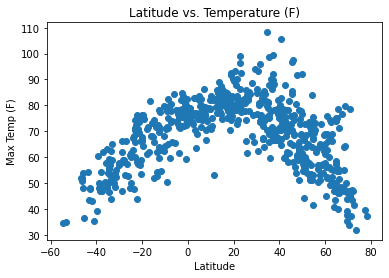

In [8]:
make_graph(x = weather_df["lat"], y = weather_df["max_temp"], x_label = "Latitude", y_label = "Max Temp (F)", title = "Latitude vs. Temperature (F)").show()

## Latitude vs. Humidity Plot

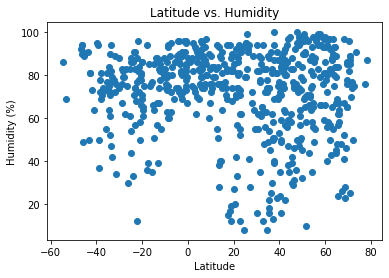

In [9]:
make_graph(x = weather_df["lat"], y = weather_df["humidity"], x_label = "Latitude", y_label = "Humidity (%)", title = "Latitude vs. Humidity").show()

## Latitude vs. Cloudiness Plot

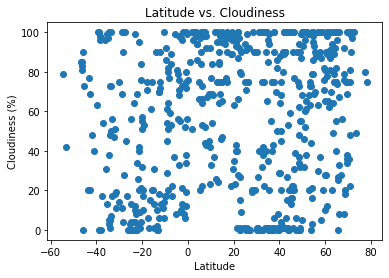

In [10]:
make_graph(x = weather_df["lat"], y = weather_df["cloudiness"], x_label = "Latitude", y_label = "Cloudiness (%)", title = "Latitude vs. Cloudiness").show()

## Latitude vs. Wind Speed Plot

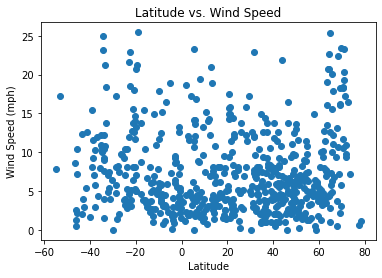

In [11]:
make_graph(x = weather_df["lat"], y = weather_df["wind_speed"], x_label = "Latitude", y_label = "Wind Speed (mph)", title = "Latitude vs. Wind Speed").show()

## Linear Regression

In [12]:
north_weather_df = weather_df[weather_df["lat"] >= 0]
south_weather_df = weather_df[weather_df["lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r = -0.66213


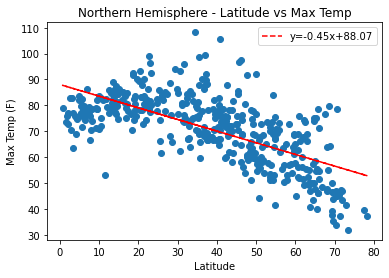

In [13]:
make_graph(x = north_weather_df["lat"], y = north_weather_df["max_temp"], x_label = "Latitude", y_label = "Max Temp (F)", title = "Northern Hemisphere - Latitude vs Max Temp", linreg = True).show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r = 0.79781


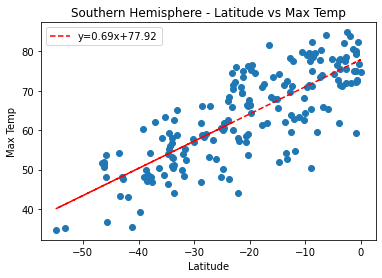

In [14]:
make_graph(x = south_weather_df["lat"], y = south_weather_df["max_temp"], x_label = "Latitude", y_label = "Max Temp", title = "Southern Hemisphere - Latitude vs Max Temp", linreg = True).show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = -0.05609


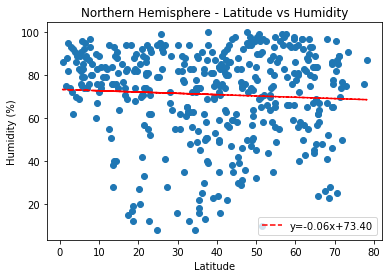

In [15]:
make_graph(x = north_weather_df["lat"], y = north_weather_df["humidity"], x_label = "Latitude", y_label = "Humidity (%)", title = "Northern Hemisphere - Latitude vs Humidity", linreg = True).show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r = 0.13562


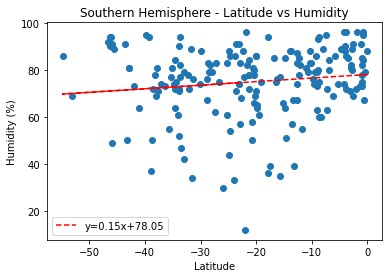

In [16]:
make_graph(x = south_weather_df["lat"], y = south_weather_df["humidity"], x_label = "Latitude", y_label = "Humidity (%)", title = "Southern Hemisphere - Latitude vs Humidity", linreg = True).show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = -0.07880


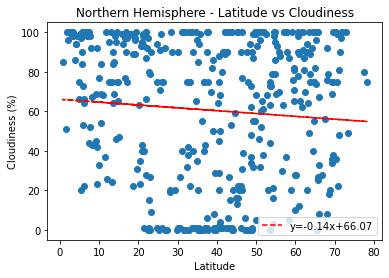

In [17]:
make_graph(x = north_weather_df["lat"], y = north_weather_df["cloudiness"], x_label = "Latitude", y_label = "Cloudiness (%)", title = "Northern Hemisphere - Latitude vs Cloudiness", linreg = True).show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r = 0.00229


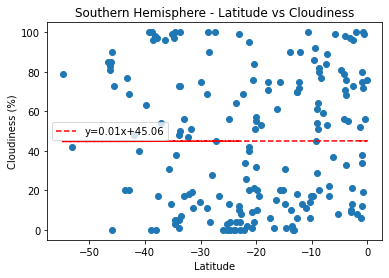

In [18]:
make_graph(x = south_weather_df["lat"], y = south_weather_df["cloudiness"], x_label = "Latitude", y_label = "Cloudiness (%)", title = "Southern Hemisphere - Latitude vs Cloudiness", linreg = True).show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = 0.12344


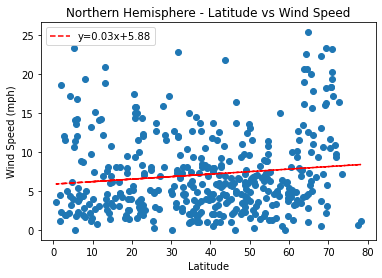

In [20]:
make_graph(x = north_weather_df["lat"], y = north_weather_df["wind_speed"], x_label = "Latitude", y_label = "Wind Speed (mph)", title = "Northern Hemisphere - Latitude vs Wind Speed", linreg = True).show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r = -0.19346


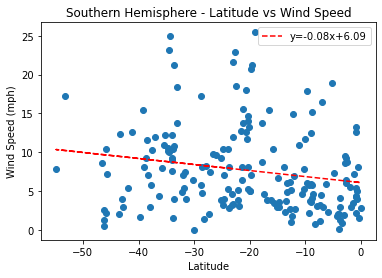

In [21]:
make_graph(x = south_weather_df["lat"], y = south_weather_df["wind_speed"], x_label = "Latitude", y_label = "Wind Speed (mph)", title = "Southern Hemisphere - Latitude vs Wind Speed", linreg = True).show()